<a href="https://colab.research.google.com/github/Nithin46/Project_Dummy/blob/main/IMDB_Enhance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
Net = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/netflix_titles.csv', low_memory=False)
Net.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [3]:
IMDB = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/IMDb movies.csv',low_memory=False)
IMDB.head(3)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0


In [4]:
new_ratings = pd.DataFrame({'Title':IMDB.title,
                    'Rating': IMDB.avg_vote})

new_ratings.drop_duplicates(subset=['Title', 'Rating'], inplace=True)

print(new_ratings.shape)
new_ratings.head(5)

(85733, 2)


,Title,Rating
0,Miss Jerry,5.9
1,The Story of the Kelly Gang,6.1
2,Den sorte drøm,5.8
3,Cleopatra,5.2
4,L'Inferno,7.0


In [5]:
Inner_join_data = new_ratings.merge(Net,left_on='Title', right_on='title', how='inner')
Inner_join_data=Inner_join_data.sort_values(by='Rating', ascending=False)

print(Inner_join_data.shape)
Inner_join_data.head(5)

(2721, 14)


,Title,Rating,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
977,Innocent,9.0,s3009,TV Show,Innocent,Seren Yüce,"Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...",Turkey,23-Jan-19,2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In a peaceful, rustic town, a retired officer ..."
988,Breakout,9.0,s1093,TV Show,Breakout,NaN,"Jeanette Aw, Elvin Ng, Zhou Ying, Christopher ...",NaN,1-Jul-17,2010,TV-14,1 Season,"International TV Shows, TV Dramas",After losing her family in a suspicious car cr...
389,Pulp Fiction,8.9,s5003,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,1-Jan-19,1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...
371,Schindler's List,8.9,s5431,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,1-Apr-18,1993,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...
1285,Inception,8.8,s2980,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...","United States, United Kingdom",1-Jan-20,2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers","In this mind-bending sci-fi thriller, a man ru..."


In [6]:
New_Data = Inner_join_data[['Title', 'Rating', 'type']]

New_Data.drop_duplicates(subset=['Title','Rating', 'type'], inplace=True)
print(New_Data.shape)
New_Data.head(5)

(2721, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Title,Rating,type
977,Innocent,9.0,TV Show
988,Breakout,9.0,TV Show
389,Pulp Fiction,8.9,Movie
371,Schindler's List,8.9,Movie
1285,Inception,8.8,Movie


In [7]:
Movies_Data = New_Data[New_Data.type == 'Movie']
TV_Data = New_Data[New_Data.type == 'TV Show']
print(Movies_Data.shape)
TV_Data.shape

(2384, 3)


(337, 3)

In [8]:
Movies_Data = Movies_Data.drop(['type'], axis=1)

In [9]:
Movies_Data

,Title,Rating
389,Pulp Fiction,8.9
371,Schindler's List,8.9
1285,Inception,8.8
2651,Ani... Dr. Kashinath Ghanekar,8.6
598,Koshish,8.6
...,...,...
832,The Vault,1.9
571,Himmatwala,1.7
2175,Aerials,1.6
1189,Pink,1.6


In [10]:
Movies_Data['Polarity_Rating'] = Movies_Data['Rating'].apply(lambda x: 'Positive' if x > 6 else 'Negative')
Movies_Data

,Title,Rating,Polarity_Rating
389,Pulp Fiction,8.9,Positive
371,Schindler's List,8.9,Positive
1285,Inception,8.8,Positive
2651,Ani... Dr. Kashinath Ghanekar,8.6,Positive
598,Koshish,8.6,Positive
...,...,...,...
832,The Vault,1.9,Negative
571,Himmatwala,1.7,Negative
2175,Aerials,1.6,Negative
1189,Pink,1.6,Negative


In [11]:
fig = px.pie(values=Movies_Data['Polarity_Rating'].value_counts(), 
             names=Movies_Data['Polarity_Rating'].value_counts().index)
fig.show()

In [12]:
Positive = Movies_Data[Movies_Data['Polarity_Rating'] == 'Positive']
Negative = Movies_Data[Movies_Data['Polarity_Rating'] == 'Negative']

print(Positive.shape)
Negative.shape

(1206, 3)


(1178, 3)

In [13]:
df = Movies_Data[['Title','Polarity_Rating']]
df

,Title,Polarity_Rating
389,Pulp Fiction,Positive
371,Schindler's List,Positive
1285,Inception,Positive
2651,Ani... Dr. Kashinath Ghanekar,Positive
598,Koshish,Positive
...,...,...
832,The Vault,Negative
571,Himmatwala,Negative
2175,Aerials,Negative
1189,Pink,Negative


In [14]:
one_hot = pd.get_dummies(df["Polarity_Rating"])
df.drop(['Polarity_Rating'],axis=1,inplace=True)
df = pd.concat([df,one_hot],axis=1)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Title,Negative,Positive
389,Pulp Fiction,0,1
371,Schindler's List,0,1
1285,Inception,0,1
2651,Ani... Dr. Kashinath Ghanekar,0,1
598,Koshish,0,1
...,...,...,...
832,The Vault,1,0
571,Himmatwala,1,0
2175,Aerials,1,0
1189,Pink,1,0


In [15]:
X = df['Title'].values
y = df.drop('Title', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [16]:
X_train

array(['Anchor and Hope', 'Kya Kehna', 'VS.', ..., 'Leap Year',
       'The Breaker Upperers', 'The Rehearsal'], dtype=object)

In [17]:
y_train

array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]], dtype=uint8)

In [18]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [19]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

In [20]:
model = Sequential()

model.add(Dense(units=12673,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=2, activation='sigmoid'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['binary_accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

In [21]:
xyz= model.fit(x=X_train, y=y_train, batch_size=50, epochs=80, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)
xyz

Epoch 1/80
43/43 [==============================] - 6s 59ms/step - loss: 0.6963 - binary_accuracy: 0.5180 - val_loss: 0.6853 - val_binary_accuracy: 0.5397
Epoch 2/80
43/43 [==============================] - 2s 43ms/step - loss: 0.4434 - binary_accuracy: 0.8409 - val_loss: 0.8197 - val_binary_accuracy: 0.5711
Epoch 3/80
43/43 [==============================] - 2s 43ms/step - loss: 0.2028 - binary_accuracy: 0.9166 - val_loss: 0.8630 - val_binary_accuracy: 0.5690
Epoch 4/80
43/43 [==============================] - 2s 42ms/step - loss: 0.1585 - binary_accuracy: 0.9081 - val_loss: 1.1686 - val_binary_accuracy: 0.5732
Epoch 5/80
43/43 [==============================] - 2s 42ms/step - loss: 0.1376 - binary_accuracy: 0.9124 - val_loss: 1.1355 - val_binary_accuracy: 0.5921
Epoch 00005: early stopping


In [22]:
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

4/4 [==============================] - 0s 9ms/step - loss: 1.1355 - binary_accuracy: 0.5921
Test accuracy: 0.5920501947402954


Best Validation Loss: 0.6853
Best Validation Accuracy: 0.5921


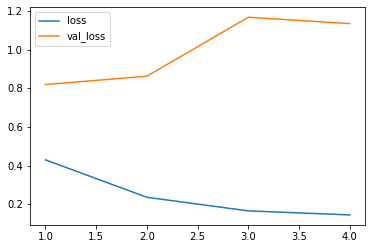

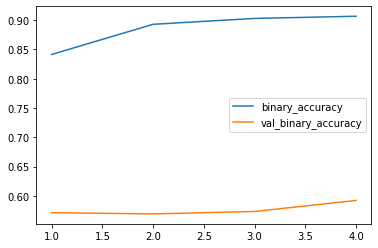

In [23]:
a = pd.DataFrame(xyz.history)

a.loc[1:, ['loss', 'val_loss']].plot()
a.loc[1:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(a['val_loss'].min(), 
              a['val_binary_accuracy'].max()))

In [ ]:
preds = model.predict(X_test)
preds